## Funcionários

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

#### Básico

Leia o arquivo funcionarios.csv em um DataFrame.

In [15]:
funcionarios = pd.read_csv('funcionarios.csv.txt')
funcionarios.head()

,id_func,nome,departamento,salario,data_admissao
0,1,Carlos,Compras,3200.0,2020-03-01
1,2,Fernanda,Vendas,4100.0,2019-09-15
2,3,Roberta,Financeiro,3550.0,2021-01-10
3,4,Gustavo,Vendas,4300.0,2018-06-01
4,5,Joana,Vendas,4700.0,2017-11-30


Liste os funcionários do departamento "Vendas".

In [88]:
funcionarios[funcionarios['departamento']=='Vendas']['nome']

1     Fernanda
3      Gustavo
4        Joana
6          Ana
10      Simone
11     Douglas
13      Marcos
17     Fabiana
18      Thiago
21      Milton
23      Denise
26     Tatiane
29       Elisa
Name: nome, dtype: object

Quantos funcionários existem em cada departamento?

In [17]:
funcionarios.groupby('departamento')['nome'].count()

departamento
Compras        7
Financeiro     5
TI             5
Vendas        13
Name: nome, dtype: int64

Qual o maior e o menor salário da empresa?

In [ ]:
func_salario = func_salario[['nome','salario']]
func_salario = func_salario.sort_values('salario',ascending=False)

print('O maior salario é do ',func_salario['nome'].iloc[0],' e é R$', func_salario['salario'].iloc[0])
print('O menor salario é do ',func_salario['nome'].iloc[-1],' e é R$', func_salario['salario'].iloc[-1])


O maior salario é do  Pedro  e é R$ 5150.0
O menor salario é do  Carlos  e é R$ 3200.0


#### Intermediário

Calcule a média salarial por departamento.

In [19]:
funcionarios.groupby('departamento')['salario'].mean()

departamento
Compras       3271.428571
Financeiro    3630.000000
TI            5020.000000
Vendas        4145.384615
Name: salario, dtype: float64

Adicione uma coluna "anos_casa" calculando o tempo de empresa (em anos completos) de cada funcionário considerando a data atual.

In [20]:
funcionarios.head()

,id_func,nome,departamento,salario,data_admissao
0,1,Carlos,Compras,3200.0,2020-03-01
1,2,Fernanda,Vendas,4100.0,2019-09-15
2,3,Roberta,Financeiro,3550.0,2021-01-10
3,4,Gustavo,Vendas,4300.0,2018-06-01
4,5,Joana,Vendas,4700.0,2017-11-30


In [21]:
funcionarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_func        30 non-null     int64  
 1   nome           30 non-null     object 
 2   departamento   30 non-null     object 
 3   salario        30 non-null     float64
 4   data_admissao  30 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ KB


In [22]:
funcionarios['data_admissao'] = pd.to_datetime(funcionarios['data_admissao'])
funcionarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_func        30 non-null     int64         
 1   nome           30 non-null     object        
 2   departamento   30 non-null     object        
 3   salario        30 non-null     float64       
 4   data_admissao  30 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.3+ KB


In [23]:
funcionarios['anos'] = ((pd.Timestamp('today').normalize() - funcionarios['data_admissao']).dt.days//365).astype(int)
funcionarios.head()

,id_func,nome,departamento,salario,data_admissao,anos
0,1,Carlos,Compras,3200.0,2020-03-01,5
1,2,Fernanda,Vendas,4100.0,2019-09-15,5
2,3,Roberta,Financeiro,3550.0,2021-01-10,4
3,4,Gustavo,Vendas,4300.0,2018-06-01,7
4,5,Joana,Vendas,4700.0,2017-11-30,7


Quais funcionários possuem mais de 5 anos de empresa?

In [24]:
funcionarios[funcionarios['anos']>5][['nome','anos']]

,nome,anos
3,Gustavo,7
4,Joana,7
7,Paulo,6
9,Ricardo,8
10,Simone,6
14,Pedro,6
15,Andre,6
17,Fabiana,7
20,Juliana,6
23,Denise,8


Gere um gráfico de barras mostrando a quantidade de funcionários por
departamento.

In [25]:
func_dep = funcionarios.groupby('departamento')['nome'].count()
func_dep = func_dep.reset_index()
func_dep.rename(columns={'nome':'quantidade'}, inplace= True)
func_dep

,departamento,quantidade
0,Compras,7
1,Financeiro,5
2,TI,5
3,Vendas,13


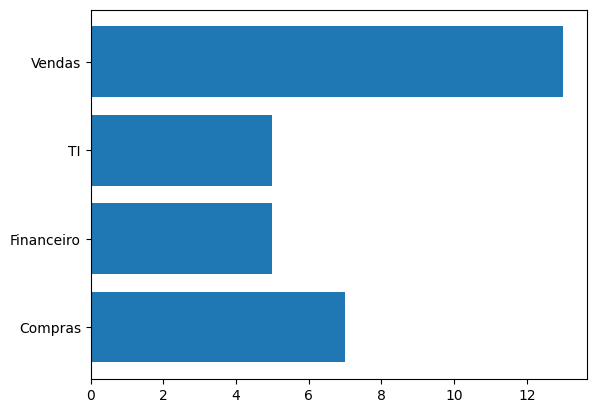

In [26]:
plt.barh(func_dep['departamento'], func_dep['quantidade'])
plt.show()

#### Avançado

Identifique o funcionário mais antigo e o mais novo (tempo de casa).

In [27]:
funcionarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_func        30 non-null     int64         
 1   nome           30 non-null     object        
 2   departamento   30 non-null     object        
 3   salario        30 non-null     float64       
 4   data_admissao  30 non-null     datetime64[ns]
 5   anos           30 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 1.5+ KB


In [31]:
funcionarios_tempo = funcionarios[['nome','data_admissao']].sort_values('data_admissao').reset_index(drop=True)
funcionarios_tempo 

,nome,data_admissao
0,Ricardo,2016-08-30
1,Denise,2016-10-24
2,Fabiana,2017-07-21
3,Joana,2017-11-30
4,Elisa,2018-04-10
5,Gustavo,2018-06-01
6,Simone,2018-10-27
7,Pedro,2018-12-01
8,Andre,2019-01-15
9,Paulo,2019-04-19


In [38]:
print('O mais antigo é ', funcionarios_tempo['nome'].iloc[0])
print('O mais novo é ', funcionarios_tempo['nome'].iloc[-1])

O mais antigo é  Ricardo
O mais novo é  Tatiane


Junte os dados de funcionários com vendas (pelo nome do vendedor) e calcule o valor total vendido por cada funcionário.

In [59]:
vendas = pd.read_csv('vendas.csv.txt')
vendas.head()

,id_venda,data,produto,unidade,preco_unitario,quantidade,vendedor
0,1,2025-07-01,Camiseta,un,49.9,2,Joana
1,2,2025-07-01,Calça,un,89.9,1,Ricardo
2,3,2025-07-02,Tênis,par,159.0,1,Ana
3,4,2025-07-02,Bermuda,un,59.9,3,Joana
4,5,2025-07-03,Meia,par,14.9,5,Ricardo


In [60]:
vendas['venda'] = vendas['preco_unitario'] * vendas['quantidade']
vendas = vendas.groupby('vendedor')['venda'].sum().reset_index()
vendas.head()

,vendedor,venda
0,Ana,781.2
1,Joana,867.7
2,Marcos,479.4
3,Pedro,657.2
4,Ricardo,633.9


In [43]:
funcionarios.head()

,id_func,nome,departamento,salario,data_admissao,anos
0,1,Carlos,Compras,3200.0,2020-03-01,5
1,2,Fernanda,Vendas,4100.0,2019-09-15,5
2,3,Roberta,Financeiro,3550.0,2021-01-10,4
3,4,Gustavo,Vendas,4300.0,2018-06-01,7
4,5,Joana,Vendas,4700.0,2017-11-30,7


In [61]:
funcionarios_vendas = funcionarios.merge(vendas,
    left_on='nome',
    right_on='vendedor',
    how='left'
)
funcionarios_vendas.drop('vendedor',axis=1, inplace= True)
funcionarios_vendas['venda'] = funcionarios_vendas['venda'].fillna(0)
funcionarios_vendas.head()

,id_func,nome,departamento,salario,data_admissao,anos,venda
0,1,Carlos,Compras,3200.0,2020-03-01,5,0.0
1,2,Fernanda,Vendas,4100.0,2019-09-15,5,0.0
2,3,Roberta,Financeiro,3550.0,2021-01-10,4,0.0
3,4,Gustavo,Vendas,4300.0,2018-06-01,7,0.0
4,5,Joana,Vendas,4700.0,2017-11-30,7,867.7


Crie uma tabela mostrando, por departamento, o colaborador com o maior salário.

In [62]:
funcionarios.head()

,id_func,nome,departamento,salario,data_admissao,anos
0,1,Carlos,Compras,3200.0,2020-03-01,5
1,2,Fernanda,Vendas,4100.0,2019-09-15,5
2,3,Roberta,Financeiro,3550.0,2021-01-10,4
3,4,Gustavo,Vendas,4300.0,2018-06-01,7
4,5,Joana,Vendas,4700.0,2017-11-30,7


In [146]:
nome_dep_sal = funcionarios[['nome','departamento','salario']].sort_values(by=['departamento','salario'],ascending=[True,False]).reset_index(drop=True)
nome_dep_sal

,nome,departamento,salario
0,Rafael,Compras,3340.0
1,Patricia,Compras,3320.0
2,Guilherme,Compras,3290.0
3,Sandra,Compras,3280.0
4,Paulo,Compras,3250.0
5,Elias,Compras,3220.0
6,Carlos,Compras,3200.0
7,Alessandra,Financeiro,3750.0
8,Andre,Financeiro,3700.0
9,Leticia,Financeiro,3630.0


In [144]:
departamento = list(funcionarios['departamento'].unique())
df = []
for i in departamento:
    df.append(nome_dep_sal[nome_dep_sal['departamento'] == i].iloc[0])
    df.append(nome_dep_sal[nome_dep_sal['departamento'] == i].iloc[-1])
df = pd.DataFrame(df).reset_index(drop=True)
df

,nome,departamento,salario
0,Rafael,Compras,3340.0
1,Carlos,Compras,3200.0
2,Joana,Vendas,4700.0
3,Thiago,Vendas,3990.0
4,Alessandra,Financeiro,3750.0
5,Matheus,Financeiro,3520.0
6,Pedro,TI,5150.0
7,Ivan,TI,4900.0


Plote um gráfico de dispersão mostrando salário versus tempo de empresa para os funcionários de "Vendas".

In [74]:
funcionarios_vendas.head()

,id_func,nome,departamento,salario,data_admissao,anos,venda
0,1,Carlos,Compras,3200.0,2020-03-01,5,0.0
1,2,Fernanda,Vendas,4100.0,2019-09-15,5,0.0
2,3,Roberta,Financeiro,3550.0,2021-01-10,4,0.0
3,4,Gustavo,Vendas,4300.0,2018-06-01,7,0.0
4,5,Joana,Vendas,4700.0,2017-11-30,7,867.7


In [86]:
func_ve = funcionarios_vendas[funcionarios_vendas['venda']>0]
func_ve = func_ve[['anos','salario']].reset_index(drop=True)
func_ve

,anos,salario
0,7,4700.0
1,5,4200.0
2,8,4900.0
3,4,4050.0
4,6,5150.0


<function matplotlib.pyplot.show(close=None, block=None)>

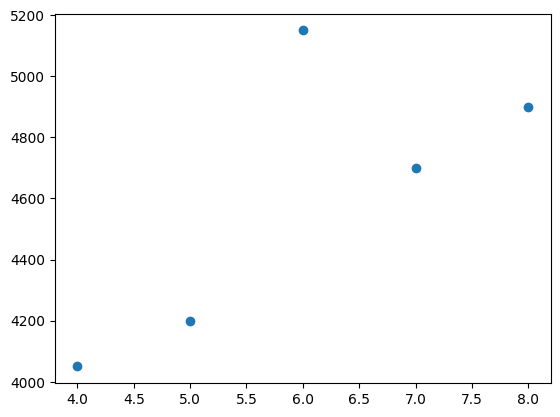

In [87]:
plt.scatter(
    func_ve['anos'],
    func_ve['salario']
)

plt.show